# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load the dataset

In [2]:
df_books = pd.read_csv('/content/Books.csv', on_bad_lines='skip', encoding='latin-1')
df_users = pd.read_csv('/content/Users.csv', on_bad_lines='skip', encoding='latin-1')
df_ratings = pd.read_csv('/content/Users.csv', on_bad_lines='skip', encoding='latin-1')

/tmp/ipython-input-2335917870.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('/content/Books.csv', on_bad_lines='skip', encoding='latin-1')


In [3]:
# what are the data types of all the columns that are present
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [5]:
# Lets remane some wierd columns name
df_books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [6]:
df_books.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
df_books.iloc[237]['image_url']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [8]:
# Now load the users dataframe
df_users = pd.read_csv('/content/Users.csv', on_bad_lines='skip', encoding='latin-1')
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
# what are the data types of all the columns that are present
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
# Lets remane some wierd columns name
df_users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [11]:
df_users.tail()

,user_id,location,age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [12]:
# Now load the ratings dataframe
df_ratings = pd.read_csv('/content/Ratings.csv', on_bad_lines='skip', encoding='latin-1')
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
# what are the data types of all the columns that are present
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
# Lets remane some wierd columns name
df_ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [15]:
df_ratings.tail()

,user_id,ISBN,rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [16]:
# Shape of the dataframe
print(df_books.shape, df_users.shape, df_ratings.shape, sep='\n')


(271360, 8)
(278858, 3)
(1149780, 3)


In [17]:
df_ratings['user_id'].value_counts()

,count
user_id,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
119573,1
276706,1
276697,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

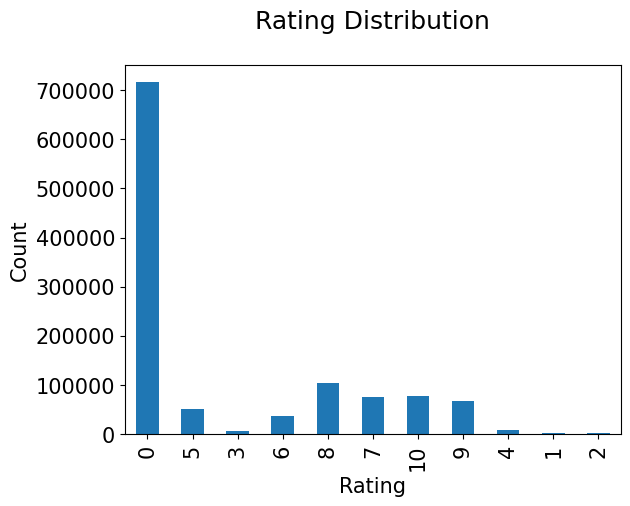

In [19]:
# Visualize the rating distributions
plt.rc("font", size=15)
df_ratings['rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

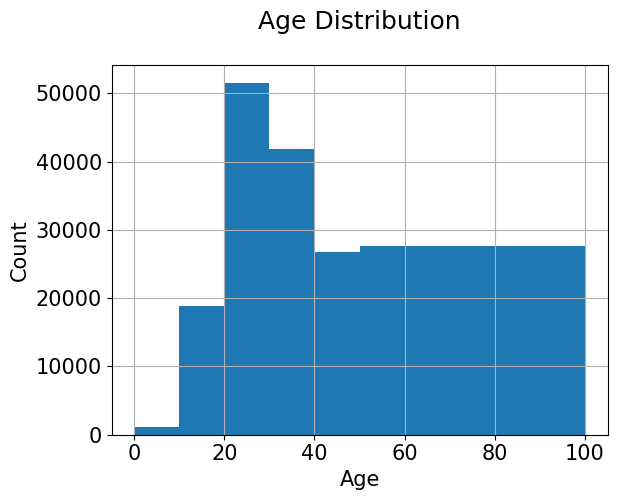

In [20]:
df_users['age'].hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

#### Check for missing values


In [21]:
df_books.isnull().sum()

,0
ISBN,0
title,0
author,2
year,0
publisher,2
Image-URL-S,0
Image-URL-M,0
image_url,3


In [22]:
df_users.isnull().sum()

,0
user_id,0
location,0
age,110762


In [23]:
df_ratings.isnull().sum()

,0
user_id,0
ISBN,0
rating,0


In [24]:
# Check the duplicates values
print(df_books.duplicated().sum())
print(df_users.duplicated().sum())
print(df_ratings.duplicated().sum())

0
0
0


In [25]:
# Handling missing values
# replacing the null valuess with null string
df_books['publisher'].fillna('', inplace=True)
df_books['author'].fillna('', inplace=True)
df_books['image_url'].fillna('', inplace=True)

# replacing the null valuess with median value of age
df_users['age'].fillna(df_users['age'].median(), inplace=True)

/tmp/ipython-input-987530711.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_books['publisher'].fillna('', inplace=True)
/tmp/ipython-input-987530711.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [26]:
print(df_books.isnull().sum())
print('===========')
print(df_users.isnull().sum())
print('===========')
df_ratings.isnull().sum()

ISBN           0
title          0
author         0
year           0
publisher      0
Image-URL-S    0
Image-URL-M    0
image_url      0
dtype: int64
user_id     0
location    0
age         0
dtype: int64


,0
user_id,0
ISBN,0
rating,0


#Recommendation Based on Rating Counts

In [27]:
rating_count_df = pd.DataFrame(df_ratings.groupby('ISBN')['rating'].count())
rating_count_df.sort_values('rating', ascending=False).head()


,rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [28]:
# The book with ISBN “0971880107” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, df_books, on='ISBN')
most_rated_books_summary

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [29]:
# check books with less than 100 ratings
df_books['ISBN'].isin(rating_count_df[rating_count_df < 100].index).sum()

np.int64(270151)

### Popularity Based Recommender System


In [30]:
ratings_with_books = df_ratings.merge(df_books, on='ISBN')

In [31]:
num_rating_df = ratings_with_books.groupby('title')['rating'].count().reset_index()
num_rating_df.rename(columns={'rating':'num_of_ratings'},inplace=True)
num_rating_df.head(8)

,title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2


In [32]:
average_rating_df = pd.DataFrame(ratings_with_books.groupby('title')['rating'].mean()).reset_index()
average_rating_df.rename(columns={'rating':'average_rating'},inplace=True)

In [33]:
average_rating_df.head(8)

,title,average_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00


In [34]:
popular_df = num_rating_df.merge(average_rating_df, on='title')
popular_df

,title,num_of_ratings,average_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Ã?lpiraten.,2,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Ã?sterlich leben.,1,7.000000
241069,Ã?Ã?stlich der Berge.,3,2.666667


In [35]:
popular_df = popular_df[popular_df['num_of_ratings']>=250].sort_values('average_rating',ascending=False).head(50)

In [36]:
popular_df = popular_df.merge(df_books,on='title').drop_duplicates('title')[['title','author','image_url','num_of_ratings','average_rating']]

In [37]:
popular_df

,title,author,image_url,num_of_ratings,average_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [78]:
import joblib

joblib.dump(popular_df, "popular_df.pkl")


['popular_df.pkl']

### Collaborative filtering based Recommendation System


In [39]:
# Filtering out those users, who have Given ratings to books more than 150 Times
x = ratings_with_books.groupby('user_id').count()['rating'] > 150


In [40]:
x[x].shape

(1115,)

In [41]:
imp_users = x[x].index

In [42]:
filtered_rating = ratings_with_books[ratings_with_books['user_id'].isin(imp_users)]

In [43]:
y = filtered_rating.groupby('title').count()['rating']>=50

In [44]:
famous_books = y[y].index

In [45]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=868)

In [46]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_books)]


In [47]:
final_ratings

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1030947,276680,0688163165,10,Mystic River,Dennis Lehane,2001,William Morrow &amp; Company,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...
1030953,276680,0743411323,0,Never Change,Elizabeth Berg,2001,Atria,http://images.amazon.com/images/P/0743411323.0...,http://images.amazon.com/images/P/0743411323.0...,http://images.amazon.com/images/P/0743411323.0...
1030957,276680,0743422449,0,Mercy,Jodi Picoult,2001,Washington Square Press,http://images.amazon.com/images/P/0743422449.0...,http://images.amazon.com/images/P/0743422449.0...,http://images.amazon.com/images/P/0743422449.0...
1030962,276680,0743486226,6,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...,http://images.amazon.com/images/P/0743486226.0...


In [48]:
final_ratings.shape

(75201, 10)

### Creating Pivot Table of UsersID vs Books and values are Ratings.



In [49]:
df_pivot = final_ratings.pivot_table(index='title',columns='user_id',values='rating')

In [50]:
df_pivot.fillna(0,inplace=True)

In [51]:
df_pivot.shape

(868, 1110)

In [52]:
df_pivot

user_id,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using cosine_similarity to calculate the distance of the values of one book with another in a 2-D space (euclidean distance)

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(df_pivot)

In [54]:
similarity_scores.shape

(868, 868)

In [55]:
similarity_scores

array([[1.        , 0.07980265, 0.00974903, ..., 0.09658948, 0.06448266,
        0.03549567],
       [0.07980265, 1.        , 0.25233692, ..., 0.06000464, 0.14873547,
        0.1435961 ],
       [0.00974903, 0.25233692, 1.        , ..., 0.03769791, 0.04493654,
        0.09205667],
       ...,
       [0.09658948, 0.06000464, 0.03769791, ..., 1.        , 0.06439035,
        0.01670749],
       [0.06448266, 0.14873547, 0.04493654, ..., 0.06439035, 1.        ,
        0.09936127],
       [0.03549567, 0.1435961 , 0.09205667, ..., 0.01670749, 0.09936127,
        1.        ]])

### Fecting the Indexes of Books which are at the closest distance to the Book(input)

In [56]:
def book_recommendation(book_name):
    # index fetch
    index = np.where(df_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]

    data = []
    for i in similar_items:
        item = []
        temp_df = df_books[df_books['title'] == df_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['image_url'].values))

        data.append(item)

    return data

In [57]:
book_recommendation('1984')


[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.LZZZZZZZ.jpg'],
 ['Lord of the Flies',
  'William Gerald Golding',
  'http://images.amazon.com/images/P/0399501487.01.LZZZZZZZ.jpg'],
 ["Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
  'Kurt Vonnegut',
  'http://images.amazon.com/images/P/0440180295.01.LZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.LZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.LZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.LZZZZZZZ.jpg'],
 ['Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
  'Stefan Fatsis',
  'http://images.amazon.com/images/P/0142002267.01.LZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.LZZZZZZZ.jp

In [58]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(df_pivot)


In [59]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

## Build the KNN Model

In [60]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')
model.fit(book_sparse)


NearestNeighbors(algorithm='brute')

In [61]:
# Save the model
import joblib
joblib.dump(model,'KNN_model')

['KNN_model']

In [77]:
joblib.dump(model, 'KNN_model.pkl')
model = joblib.load('KNN_model.pkl')


In [62]:
distance, suggestion = model.kneighbors(df_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )


In [63]:
print(distance)


[[ 0.         38.78143886 39.16631206 39.28103868 39.68626967 39.83716857]]


In [64]:
print(suggestion)

[[237 377 227 427 173 126]]


In [65]:
df_pivot.iloc[241,:]

,Fortune's Rocks: A Novel
user_id,
254,0.0
1733,0.0
1903,0.0
2033,0.0
2110,0.0
...,...
277427,0.0
277478,0.0
277639,0.0


In [66]:
for i in range(len(suggestion)):
    print(df_pivot.index[suggestion[i]])

Index(['Flesh and Blood', 'Malice', 'Fatal Cure', 'No Safe Place',
       'Deck the Halls (Holiday Classics)', 'Choke'],
      dtype='object', name='title')


In [67]:
#keeping books name
book_names = df_pivot.index

In [68]:
book_names[2]


'2nd Chance'

In [69]:
ids = np.where(final_ratings['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]


In [70]:
final_ratings.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [71]:
book_name = []
for book_id in suggestion:
    book_name.append(df_pivot.index[book_id])


In [72]:
ids_index = []
for name in book_name[0]:
    ids = np.where(final_ratings['title'] == name)[0][0]
    ids_index.append(ids)

In [73]:
for idx in ids_index:
    url = final_ratings.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0679459626.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440223237.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0425145638.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0345404777.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0743418131.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0385720920.01.LZZZZZZZ.jpg


#### To save Book Names/Title, Final Ratings, df_pivot




In [74]:
pickle.dump(book_names,open('book_names.pkl','wb'))
pickle.dump(final_ratings,open('final_ratings.pkl','wb'))
pickle.dump(df_pivot,open('df_pivot.pkl','wb'))

# Make recommendation with KNN save Model

In [75]:
def get_knn_recommendations_book(book_name):
    book_id = np.where(df_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(df_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )

    for i in range(len(suggestion)):
            books = df_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [76]:
book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
get_knn_recommendations_book(book_name)

You searched 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggestion books are: 

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Jacob Have I Loved
Exclusive
